In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.stats import rankdata, spearmanr

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')
set_matplotlib_formats('svg')

In [2]:
out_dirs = [Path(dirname) for dirname in ["heatmap_run1", "heatmap_run2", "heatmap_run3", "heatmap_run4", "heatmap_run5"]]
heatmap_dfs = [pd.read_csv(out_dir / "heatmap_upper_bound.csv", index_col=0) for out_dir in out_dirs]

In [3]:
heatmap_dfs[0]

,1,2,3,4,5,6,7,8
1,1.000000,0.927748,0.341951,0.622870,0.710667,0.883565,0.289303,0.956157
2,0.927748,1.000000,0.485906,0.607687,0.985813,0.930189,0.226827,0.100341
3,0.341951,0.485906,1.000000,0.680289,0.699710,0.229358,0.286963,0.806091
4,0.622870,0.607687,0.680289,1.000000,0.964174,0.658283,0.322304,0.308134
5,0.710667,0.985813,0.699710,0.964174,1.000000,0.718647,0.357097,0.808059
6,0.883565,0.930189,0.229358,0.658283,0.718647,1.000000,0.570716,0.001238
7,0.289303,0.226827,0.286963,0.322304,0.357097,0.570716,1.000000,0.500769
8,0.956157,0.100341,0.806091,0.308134,0.808059,0.001238,0.500769,1.000000


In [4]:
heatmap_dfs[1]

,1,2,3,4,5,6,7,8
1,1.000000,0.927748,0.318661,0.530028,0.598043,0.946824,0.350449,0.514419
2,0.927748,1.000000,0.485906,0.771849,0.985813,0.882505,0.226827,0.100341
3,0.318661,0.485906,1.000000,0.488730,0.999608,0.229358,0.286963,0.003043
4,0.530028,0.771849,0.488730,1.000000,0.964174,0.658283,0.322304,0.502499
5,0.598043,0.985813,0.999608,0.964174,1.000000,0.718647,0.357097,0.503103
6,0.946824,0.882505,0.229358,0.658283,0.718647,1.000000,0.485880,0.307268
7,0.350449,0.226827,0.286963,0.322304,0.357097,0.485880,1.000000,0.803218
8,0.514419,0.100341,0.003043,0.502499,0.503103,0.307268,0.803218,1.000000


In [5]:
heatmap_tables = [pd.melt(heatmap_df.reset_index(), id_vars="index").assign(run=i) for i, heatmap_df in enumerate(heatmap_dfs)]
heatmap_tables = pd.concat(heatmap_tables)
heatmap_tables

,index,variable,value,run
0,1,1,1.000000,0
1,2,1,0.927748,0
2,3,1,0.341951,0
3,4,1,0.622870,0
4,5,1,0.710667,0
5,6,1,0.883565,0
6,7,1,0.289303,0
7,8,1,0.956157,0
8,1,2,0.927748,0
9,2,2,1.000000,0


In [6]:
all_heatmaps = np.concatenate([heatmap_df.values[np.newaxis, :, :] for heatmap_df in heatmap_dfs])

In [7]:
all_heatmaps.shape

(5, 8, 8)

In [8]:
mask = np.zeros_like(all_heatmaps[0], dtype=np.bool)
mask[np.tril_indices_from(mask, -1)] = True

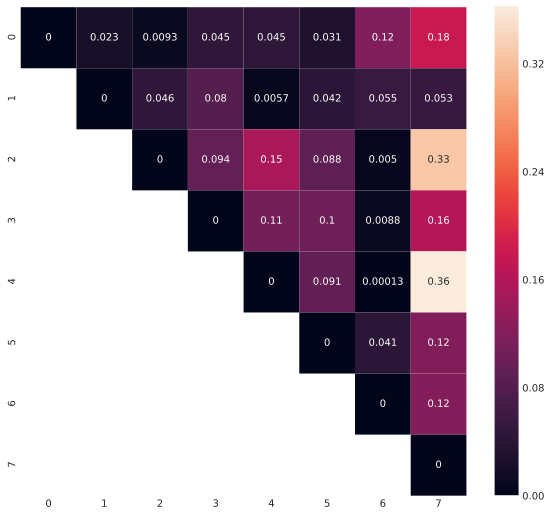

In [9]:
fig, ax = plt.subplots(figsize=(10,9))
sns.heatmap(all_heatmaps.std(axis=0), annot=True, mask=mask, ax=ax)

In [10]:
names = list(map(str, range(1, len(all_heatmaps[0]) + 1)))
names = ["ELMo", "GloVe", "skipthought", "InferSent", "DisSent", "ConvS2S", "order", "IMDB"]
final = pd.DataFrame(all_heatmaps.mean(axis=0), index=names, columns=names)
final.head()

,ELMo,GloVe,skipthought,InferSent,DisSent,ConvS2S,order,IMDB
ELMo,1.000000,0.916109,0.323326,0.567011,0.620320,0.908830,0.376677,0.717436
GloVe,0.916109,1.000000,0.463141,0.706158,0.988666,0.889105,0.254158,0.057599
skipthought,0.323326,0.463141,1.000000,0.565473,0.724692,0.273164,0.289428,0.548636
InferSent,0.567011,0.706158,0.565473,1.000000,0.877330,0.607335,0.317841,0.524595
DisSent,0.620320,0.988666,0.724692,0.877330,1.000000,0.672842,0.356988,0.425286


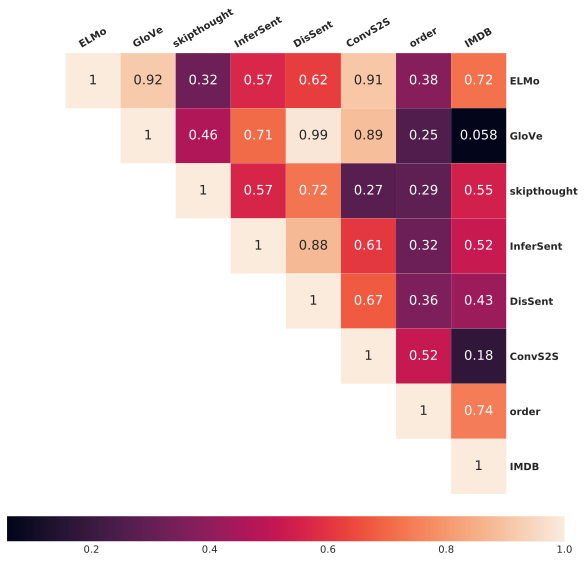

In [11]:
fig, (ax, cbar_ax) = plt.subplots(2, figsize=(10,9), gridspec_kw={"height_ratios": (.9, .05), "hspace": .1})
sns.set(font_scale=1.1)
sns.heatmap(final, annot=True, square=True, mask=mask, ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})
ax.set_facecolor("white")
ax.xaxis.tick_top()
ax.yaxis.tick_right()
for tick in ax.xaxis.get_ticklabels():
    tick.set_rotation(30)
    tick.set_fontweight("bold")
for tick in ax.yaxis.get_ticklabels():
    tick.set_rotation(0)
    tick.set_fontweight("bold")

Text(0.5,1,'Each boxplot corresponds to a model / row in the RSA heatmap.')

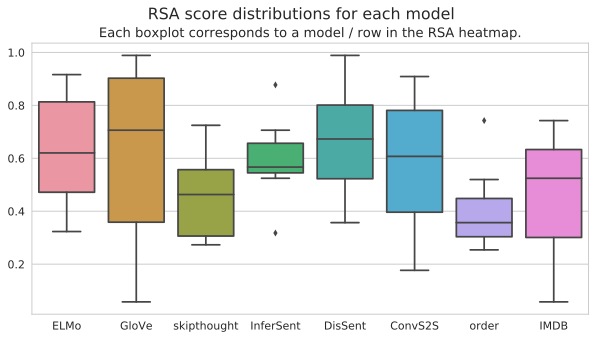

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=final.replace(1, np.nan), ax=ax, )
ax.set_facecolor("white")
plt.suptitle("RSA score distributions for each model")
plt.title("Each boxplot corresponds to a model / row in the RSA heatmap.")